In [1]:
# loading libraries

library(ggplot2)
library(glue)

In [2]:
# plot size

std_width  <- 12
std_height <- 8
options(repr.plot.width = std_width, repr.plot.height = std_height)

In [3]:
# colors for plot

color_palette <- c( "#58508d",
                    "#bc5090",
                    "#ff6361",
                    "#ffa600" )

# Exercise 1: Discrete random variable

The probability distribution of a discrete variable $k$ is given by the following:

$$ p(k) = \frac{k}{15} \,\,\,\, \text{if} \,\,\,\, k = 1,2,3,4,5 \,\,\,\, \text{otherwise} \,\,\,\, p(k)=0 $$

#### 1) Write the R probability functions for the probability density and cumulative distribution functions, following the R naming convention

Since we have a discrete distribution, we can express its probability distribution function.
Following the R naming convention, `d` before the function name stands for *density*, although we do not actually have a probability density function (PDF) because we have a discrete distribution.

The probability distribution function is given by:

In [831]:
# probability distribution function 

dcustom <- function(k) {
    ifelse(k %in% 1:5, k/15, 0)
}

For a discrete distribution, the cumulative distribution function (CDF) is, by definition

$$ F(k_i) = P(K \le k_i) = \sum_{j=1}^{i} k_j $$

and in our case it results

* if $k = 1,2,3,4,5$, 
  $$F(k) = \frac{k(k+1)}{30}$$
* if $k<1$, $F(k) = 0$
* if $k>5$, $F(k) = 1$

The CDF, with `p` before the function name in the R convention, is then:

In [832]:
# cumulative distribution function (CDF)

pcustom <- function(k) {
    ifelse(k < 1, 0, ifelse(k < 5, k*(k+1)/30, 1))
}

#### 2) Produce two plots showing the pdf and cdf, separately

In [833]:
x <- 0:6

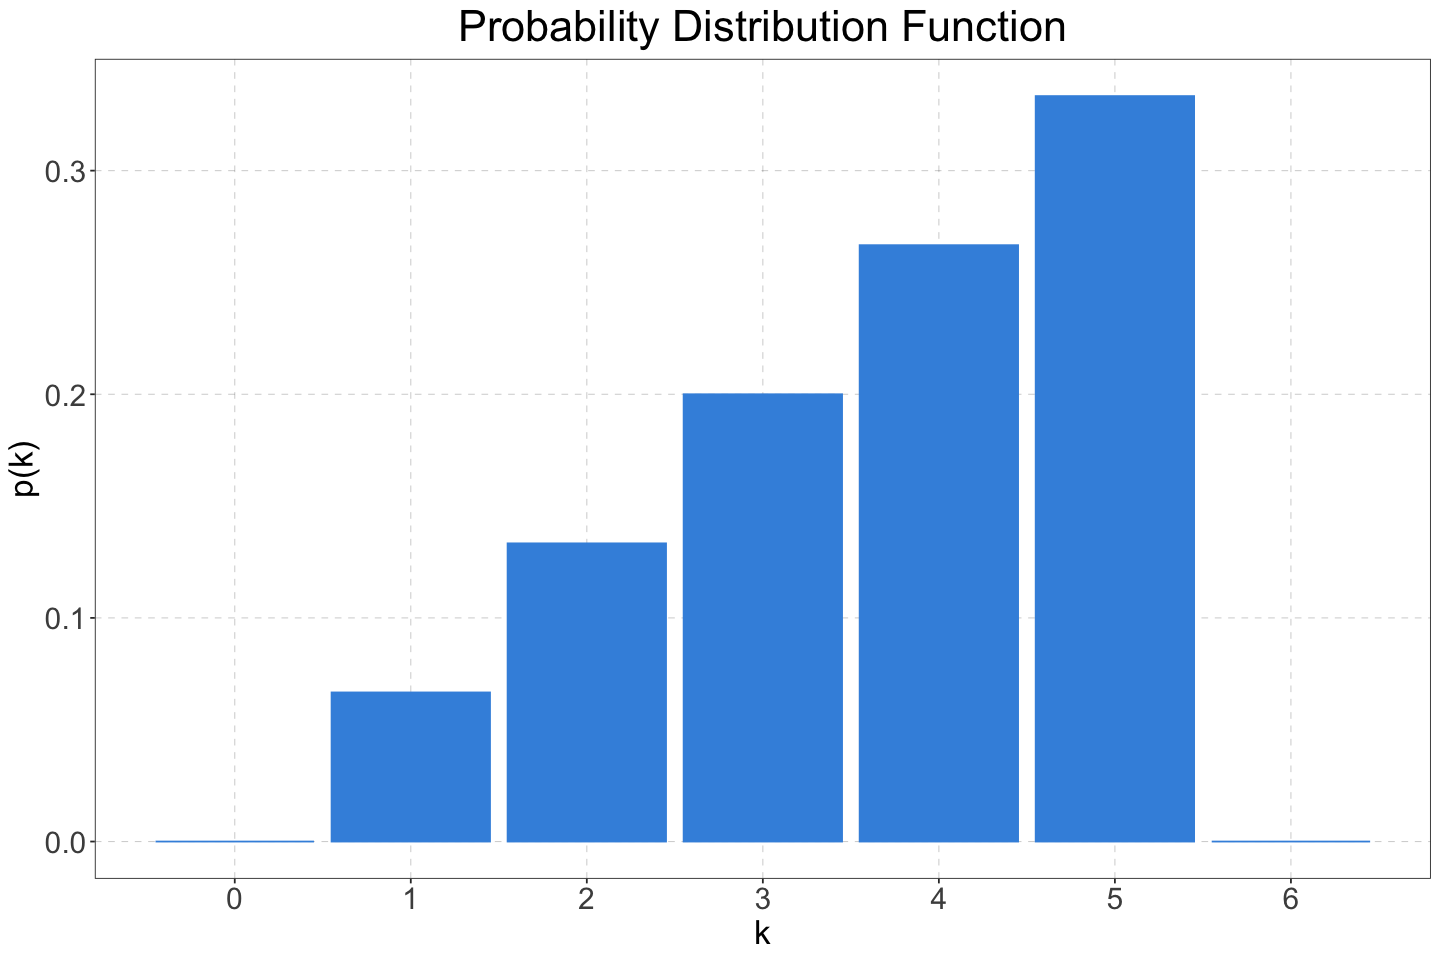

In [834]:
# pdf plot

d <- ggplot() + 
        geom_col(aes(x = x, y = dcustom(x)), color = "#3f92df", fill = "#3f92df")
d <- d + 
    theme_bw() +
    theme( plot.title = element_text(size = 26, hjust = 0.5),
        axis.title = element_text(size = 20),
        axis.text  = element_text(size = 18),
        legend.title = element_text(size = 20, hjust = 0.5),
        legend.text  = element_text(size = 18),
        panel.grid.major.y = element_line( color = alpha("black",0.2),
                                           linewidth = 0.3,
                                           linetype = 2 ),
        panel.grid.major.x = element_line( color = alpha("black",0.2),
                                          linewidth = 0.3,
                                          linetype = 2 ),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        legend.background = element_rect( fill = "white",
                                          linewidth = 0.5, 
                                          linetype = "solid", 
                                          colour = "grey" ) ) +
        scale_color_manual(values = color_palette) +
        labs( x = "k", 
              y = "p(k)", 
              title = "Probability Distribution Function" ) +
        scale_x_continuous(n.breaks = 7)

d

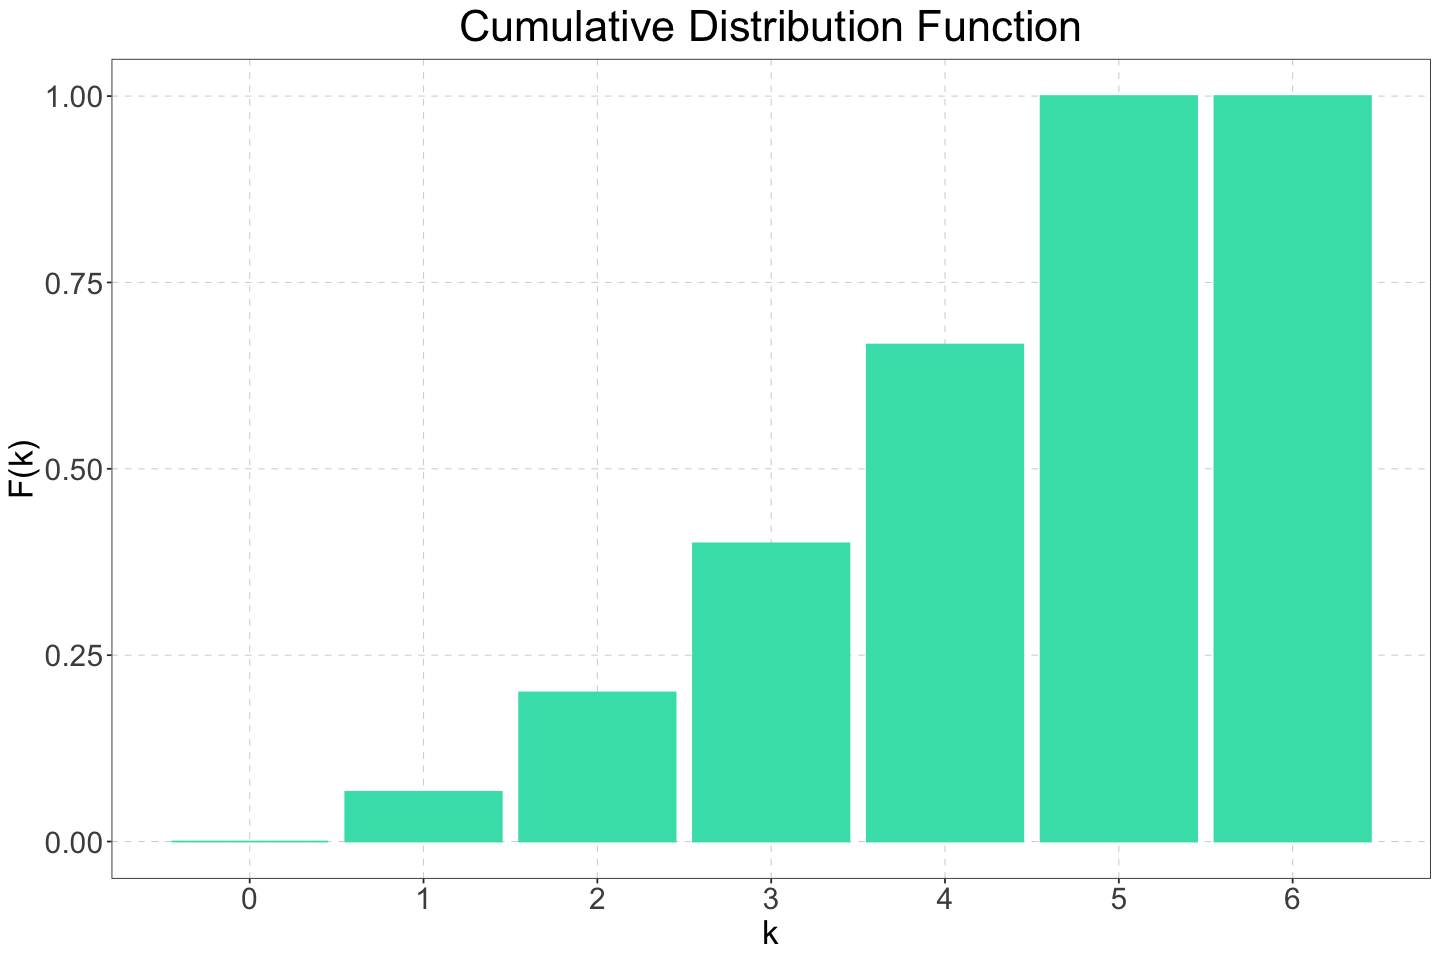

In [835]:
# cdf plot

p <- ggplot() + 
        geom_col( aes(x = x, y = pcustom(x)), color = "#3fdfb7", fill = "#3fdfb7")
p <- p + 
    theme_bw() +
    theme( plot.title = element_text(size = 26, hjust = 0.5),
        axis.title = element_text(size = 20),
        axis.text  = element_text(size = 18),
        legend.title = element_text(size = 20, hjust = 0.5),
        legend.text  = element_text(size = 18),
        panel.grid.major.y = element_line( color = alpha("black",0.2),
                                           linewidth = 0.3,
                                           linetype = 2 ),
        panel.grid.major.x = element_line( color = alpha("black",0.2),
                                          linewidth = 0.3,
                                          linetype = 2 ),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        legend.background = element_rect( fill = "white",
                                          linewidth = 0.5, 
                                          linetype = "solid", 
                                          colour = "grey" ) ) +
        scale_color_manual(values = color_palette) +
        labs( x = "k", 
              y = "F(k)", 
              title = "Cumulative Distribution Function" ) +
        scale_x_continuous(n.breaks = 7)

p

#### 3) Compute, using R, the mean value and variance of the probability distribution

Since we have a discrete probability distribution, the mean value is given by:

$$ E[X] = \sum_{x} x \, p(x) $$

and the variance is

$$ var[X] = E[(X-E[X])^2] $$

In [836]:
# mean value

mu <- sum( x * dcustom(x) )

cat(glue("The mean value of the probability distribution is {round(mu,2)}."))

The mean value of the probability distribution is 3.67.

In [837]:
# variance

var <- sum( (x - mu)^2 * dcustom(x) )

cat(glue("The variance of the probability distribution is {round(var,2)}."))

The variance of the probability distribution is 1.56.

#### 4) Compute, using R, the expected value $E [k (6 − k)]$

Following the definition of the expected value, we have to compute the following quantity:

$$ E[k(6-k)] = \sum_{k} k\,(6-k)\,p(k) $$

In [838]:
j <- sum( x*(6-x)*dcustom(x) )

cat(glue("The expected value we are looking for is {round(j,2)}."))

The expected value we are looking for is 7.

#### 5) Write the R function that allows to sample random numbers from the probability distribution

To write a function that allows to sample random numbers from our probability distribution, we use the inverse CDF method. We compute the inverse CDF, that is, the quantile function, and it results in

$$ q(u) = \frac{\sqrt{1+120\,u}-1}2$$

where we have chosen the square root with a positive sign since we want the function to return values greater than 1. Moreover, we round up the values returned by the function because the probability distribution is discrete.

Finally, we implement a function to sample random values from our probability distribution: it generates $n$ random values from a uniform distribution $\mathcal{U}[0,1]$ and it gives them to the quantile function, returning random values from our distribution.

In the R naming convention, `q` stands for *quantile* function and `r` for *random* generation function.

In [839]:
# inverse CDF (quantile function)

qcustom <- function(u) {
    k <- ( sqrt(1+120*u) - 1 ) / 2
    return(ceiling(k))
}


# function to sample random values
# n is the sample dimension

rcustom <- function(n) {
    u <- runif(n)
    return( qcustom(u) )
}

#### 6) Using the implemented function, sample $10^5$ random numbers from this distribution and plot them in a graph showing the distribution of the numbers superimposed to the pdf (normalize properly the plots with random numbers)

In [840]:
# sample dimension
n <- 10^5

# sample of random values from our distribution
s <- rcustom(n)

To normalize properly the histogram used to represent out sampling, we use the function `after_stat(density)` for the counts.

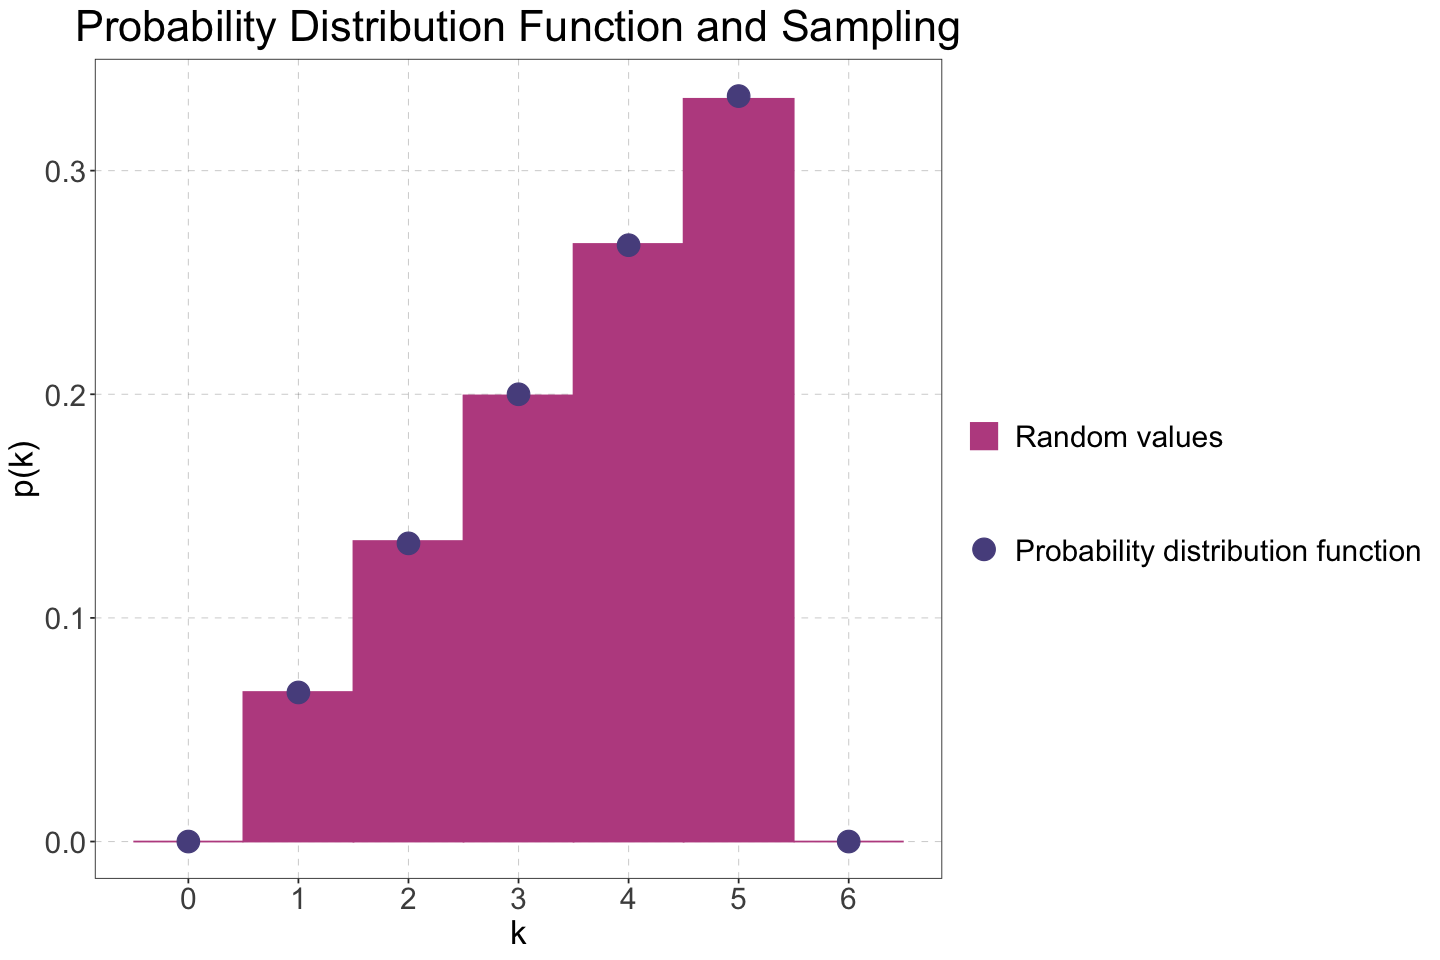

In [841]:
# plot

h1 <- ggplot() +
        geom_histogram( aes( x = s, y = after_stat(density), fill = "Random values" ), 
                        binwidth = 1, 
                        colour = color_palette[2]) + 
        geom_point( 
                aes( x = x, y = dcustom(x), color = "Probability distribution function"),
                size = 6 )
h1 <- h1 +
        theme_bw() +
        theme( legend.position = "right",
        plot.title = element_text(size = 26, hjust = 0.5),
        axis.title = element_text(size = 20),
        axis.text  = element_text(size = 18),
        legend.title = element_text(size = 20, hjust = 0.5),
        legend.text  = element_text(size = 18),
        panel.grid.major.y = element_line( color = alpha("black",0.2),
                                           linewidth = 0.3,
                                           linetype = 2 ),
        panel.grid.major.x = element_line( color = alpha("black",0.2),
                                          linewidth = 0.3,
                                          linetype = 2 ),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        legend.background = element_rect( fill = "white",
                                          linewidth = 0.5, 
                                          linetype = "solid", 
                                          colour = "white" ) ) +
        labs( x = "k", 
              y = "p(k)", 
              title = "Probability Distribution Function and Sampling" ) +
        scale_x_continuous(n.breaks = 7) +
        scale_color_manual(name = "", 
                        values = c("Probability distribution function" = color_palette[1])) +
        scale_fill_manual(name = "", values = c("Random values" = color_palette[2]))
        
h1

From the plot, we can observe that the simulation follows perfectly the probability distribution function.

----------------------------------------------------------------------------------------

# Exercise 2: Continuous random variable

The triangular distribution, in the interval $(a,b)$, is given by:

* if $a\le x<c$,

$$ f(X)=\frac{2(x-a)}{(b-a)(c-a)} $$

* if $c \le x \le b$,

$$ f(X)=\frac{2(b-x)}{(b-a)(b-c)} $$

* otherwise, $f(X)=0$

where $a \le c \le b$.

#### 1) Plot the function, given the interval $(a, b)$

In [842]:
# distribution function

dtriang <- function(x, a = 2, b = 7, c = 4) {
    ifelse( 
        x >= a & x < c, 
        2*(x-a)/((b-a)*(c-a)), 
        ifelse( 
            x >= c & x <= b, 
            2*(b-x)/((b-a)*(b-c)), 
            0 
        ) 
    )
}

In [843]:
x <- seq(0, 10, by = 0.01)

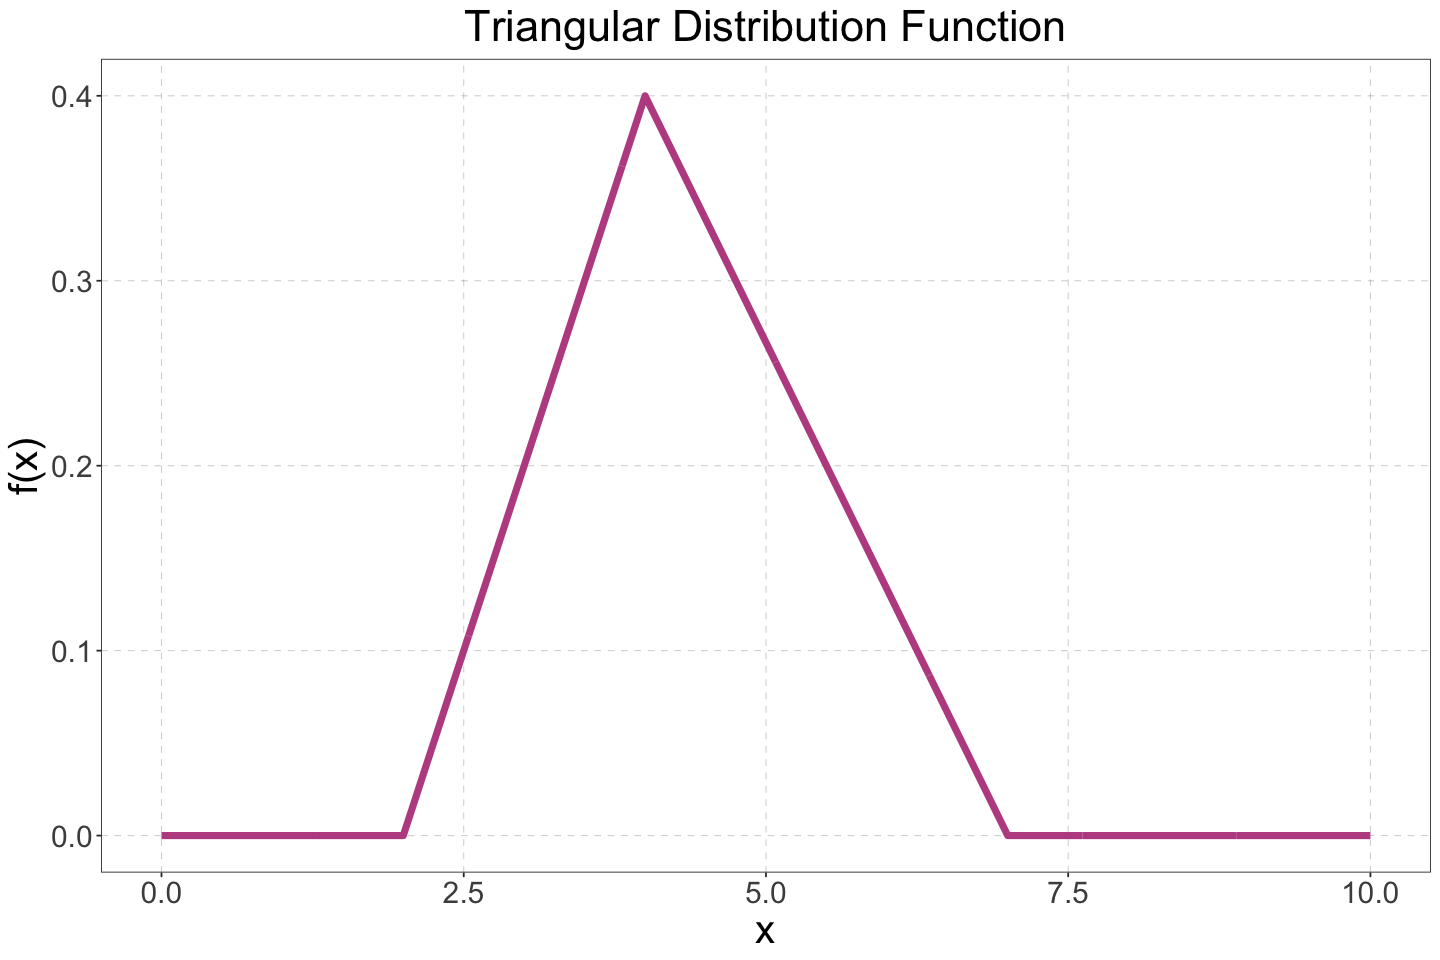

In [844]:
# plot

t <- ggplot() + 
    geom_line( aes( x = x, y = dtriang(x)), linewidth = 2, color = color_palette[2])

t <- t +
        theme_bw() +
        theme( legend.position = "right",
        plot.title = element_text(size = 26, hjust = 0.5),
        axis.title = element_text(size = 24),
        axis.text  = element_text(size = 18),
        legend.title = element_text(size = 20, hjust = 0.5),
        legend.text  = element_text(size = 20),
        panel.grid.major.y = element_line( color = alpha("black",0.2),
                                           linewidth = 0.3,
                                           linetype = 2 ),
        panel.grid.major.x = element_line( color = alpha("black",0.2),
                                          linewidth = 0.3,
                                          linetype = 2 ),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        legend.background = element_rect( fill = "white",
                                          linewidth = 0.5, 
                                          linetype = "solid", 
                                          colour = "white" ) ) +
        labs( x = "x", 
              y = "f(x)", 
              title = "Triangular Distribution Function" )
t

#### 2) Write an algorithm to generate random numbers from the triangular distribution

We use the inverse CDF method. Firstly, we compute the CDF, that for a continuous distribution is defined as

$$ F(X) =  \int_{-\infty}^{x}f(t)dt$$

and in our case results in

* if $ x < a $, $F(x)=0$

* if $a\le x<c$,

$$ F(x) = \frac{(x-a)^2}{(b-a)(c-a)} \,\,\,\,\,\,\,\,\,\,\ \text{(I)}$$ 

* if $c \le x \le b$,

$$ F(x) = \frac{(b-c)^2-(x-b)^2}{(b-a)(b-c)}$$

but this expression is equal to zero if $x=c$, and it is not growing monotonous, so we have to correct it with expression (I) evaluated in x = c:

$$ F(x) = \frac{(b-c)^2-(x-b)^2}{(b-a)(b-c)} + \frac{c-a}{b-a}\,\,\,\,\,\,\,\,\,\,\ \text{(II)}$$

* if $x > b$, $F(x)=1$

Then, we compute the inverse CDF: 

* inverting (I) we obtain 

$$ q(u) = a + \sqrt{(b-a)(c-a)u} $$

where we have chosen the square root with a positive sign since we want the function to return values greater that a in this range; moreover, we want $q(u)$ to return values smaler than $c$, so we need

$$ u < \frac{c-a}{b-a}$$

* inverting (II) we have

$$ q(u) = b - \sqrt{ (b-c)^2 - \left(u - \frac{c-a}{b-a}\right)(b-a)(b-c)} $$

where we have chosen the square root with a negative sign because we want $q(u)$ to return values smaller than $b$ in this range.

In [845]:
# quantile function (inverse CDF)

qtriang <- function(u, a = 2, b = 7, c = 4) {
    j <- (c-a)/(b-a)
    ifelse( 
        u < j, 
        a + sqrt( (b-a)*(c-a)*u ), 
        b - sqrt( (b-c)^2 - (u-j)*(b-a)*(b-c) )
    )
}

In [846]:
# function to sample random numbers from triangular distribution

rtriang <- function(n) {
    u <- runif(n)
    return( qtriang(u) )
}

#### 3) Generate $10^4$ random number from the distribution, show them in an histogram and superimpose the analytical curve

In [847]:
# sample dimensison
n <- 10^4

# sample random values from triangular distribution
s <- rtriang(n)

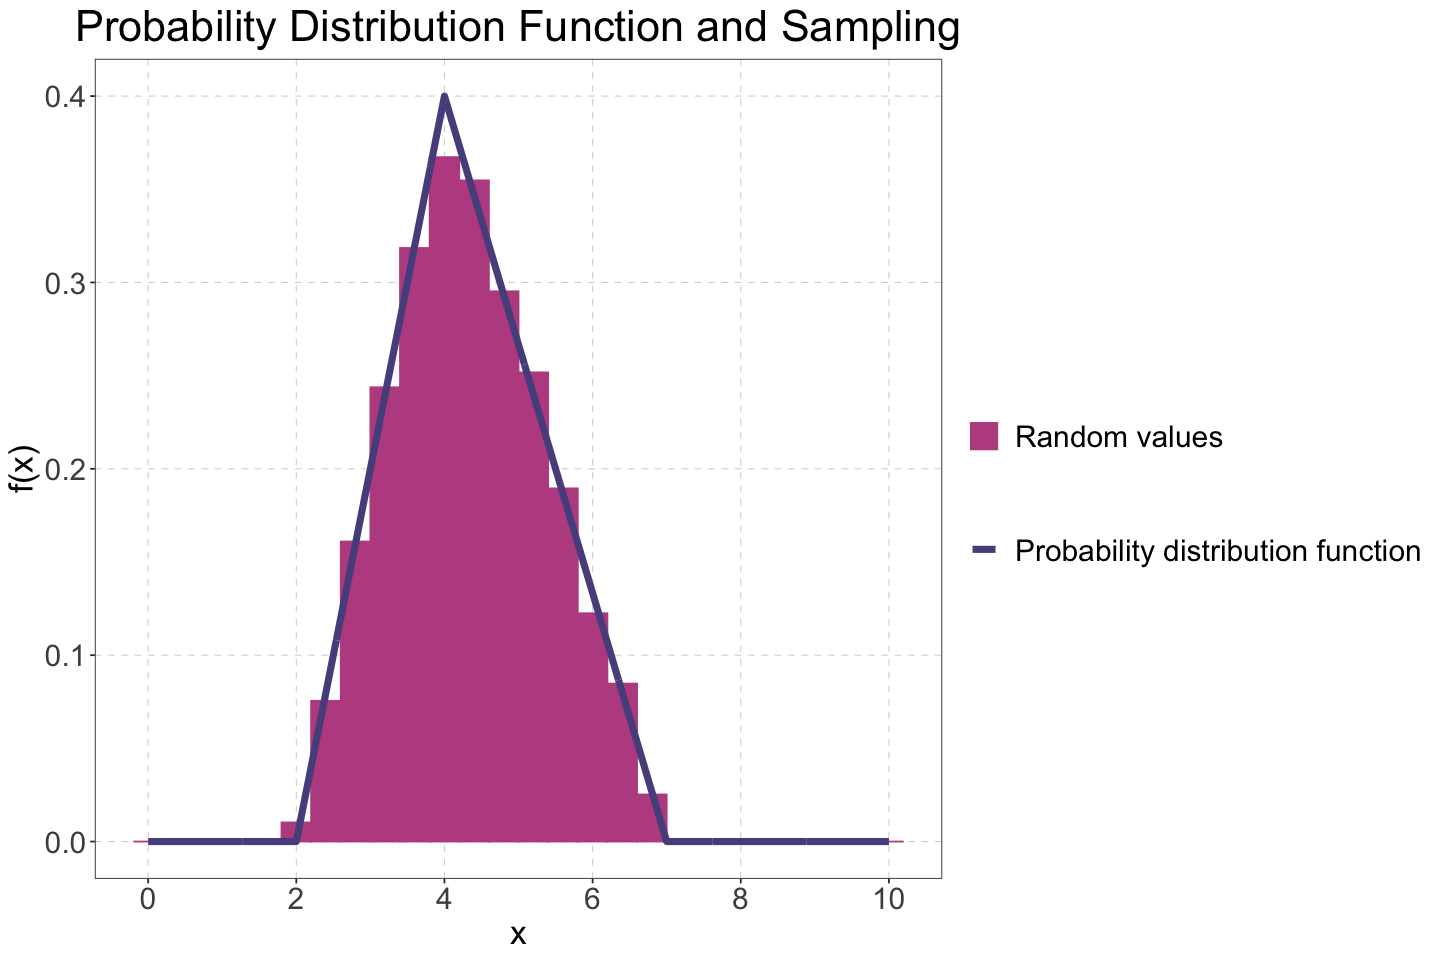

In [848]:
# plot

ht <- ggplot() + 
    geom_histogram( aes( x = s, y = after_stat(density), fill = "Random values" ), 
                        binwidth = 0.4, 
                        colour = color_palette[2] ) + 
    geom_line( aes( x = x, y = dtriang(x), color = "Probability distribution function" ),
                linewidth = 2)

ht <- ht +
        theme_bw() +
        theme( legend.position = "right",
        plot.title = element_text(size = 26, hjust = 0.5),
        axis.title = element_text(size = 20),
        axis.text  = element_text(size = 18),
        legend.title = element_text(size = 20, hjust = 0.5),
        legend.text  = element_text(size = 18),
        panel.grid.major.y = element_line( color = alpha("black",0.2),
                                           linewidth = 0.3,
                                           linetype = 2 ),
        panel.grid.major.x = element_line( color = alpha("black",0.2),
                                          linewidth = 0.3,
                                          linetype = 2 ),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        legend.background = element_rect( fill = "white",
                                          linewidth = 0.5, 
                                          linetype = "solid", 
                                          colour = "white" ) ) +
        labs( x = "x", 
              y = "f(x)", 
              title = "Probability Distribution Function and Sampling" ) +
        scale_x_continuous(n.breaks = 7) +
        scale_color_manual(name = "", 
                        values = c("Probability distribution function" = color_palette[1])) +
        scale_fill_manual(name = "", values = c("Random values" = color_palette[2]))
ht

From the plot, we can observe that the simulation follows perfectly the probability distribution function.

---------------------------------------------------------------------------------------------

# Exercise 3: Waiting time at the doctor's

The waiting time, in minutes, at the doctor’s is about 30 minutes, and the distribution follows an exponential pdf with rate $1/30$.

#### 1) Simulate the waiting time for 60 people at the doctor’s office and plot the relative histogram

To perform the simulation of the waiting time, we sample 60 random values from an exponential distribution with rate $1/30$.

In [4]:
# number of observations
n <- 60

# simulation
t <- rexp(n = n, rate = 1/30)

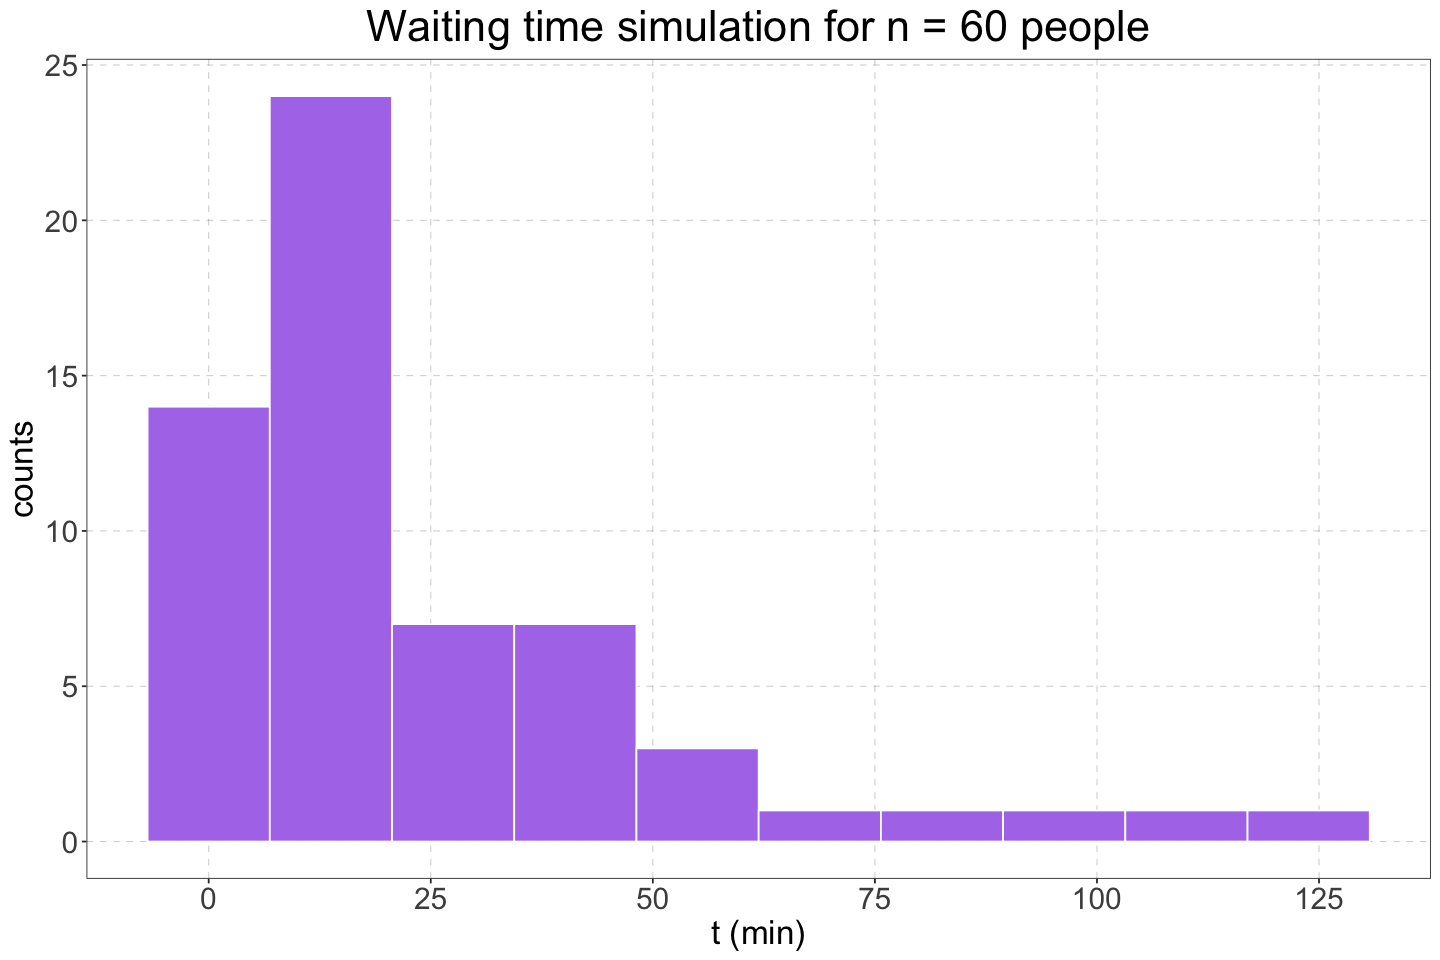

In [5]:
# histogram

h <- ggplot() + geom_histogram( aes( x = t ), bins = 10, colour = "white", fill = "#af7bea")

h <- h +
        theme_bw() +
        theme( legend.position = "right",
        plot.title = element_text(size = 26, hjust = 0.5),
        axis.title = element_text(size = 20),
        axis.text  = element_text(size = 18),
        legend.title = element_text(size = 20, hjust = 0.5),
        legend.text  = element_text(size = 18),
        panel.grid.major.y = element_line( color = alpha("black",0.2),
                                           linewidth = 0.3,
                                           linetype = 2 ),
        panel.grid.major.x = element_line( color = alpha("black",0.2),
                                          linewidth = 0.3,
                                          linetype = 2 ),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        legend.background = element_rect( fill = "white",
                                          linewidth = 0.5, 
                                          linetype = "solid", 
                                          colour = "white" ) ) +
        labs( x = "t (min)", 
              y = "counts", 
              title = "Waiting time simulation for n = 60 people" ) +
        scale_x_continuous(n.breaks = 6)

h

To better visualize how the simulation follows an exponential distribution, we plot the histogram with the theoretical distribution. The histogram in this case is properly normalized.

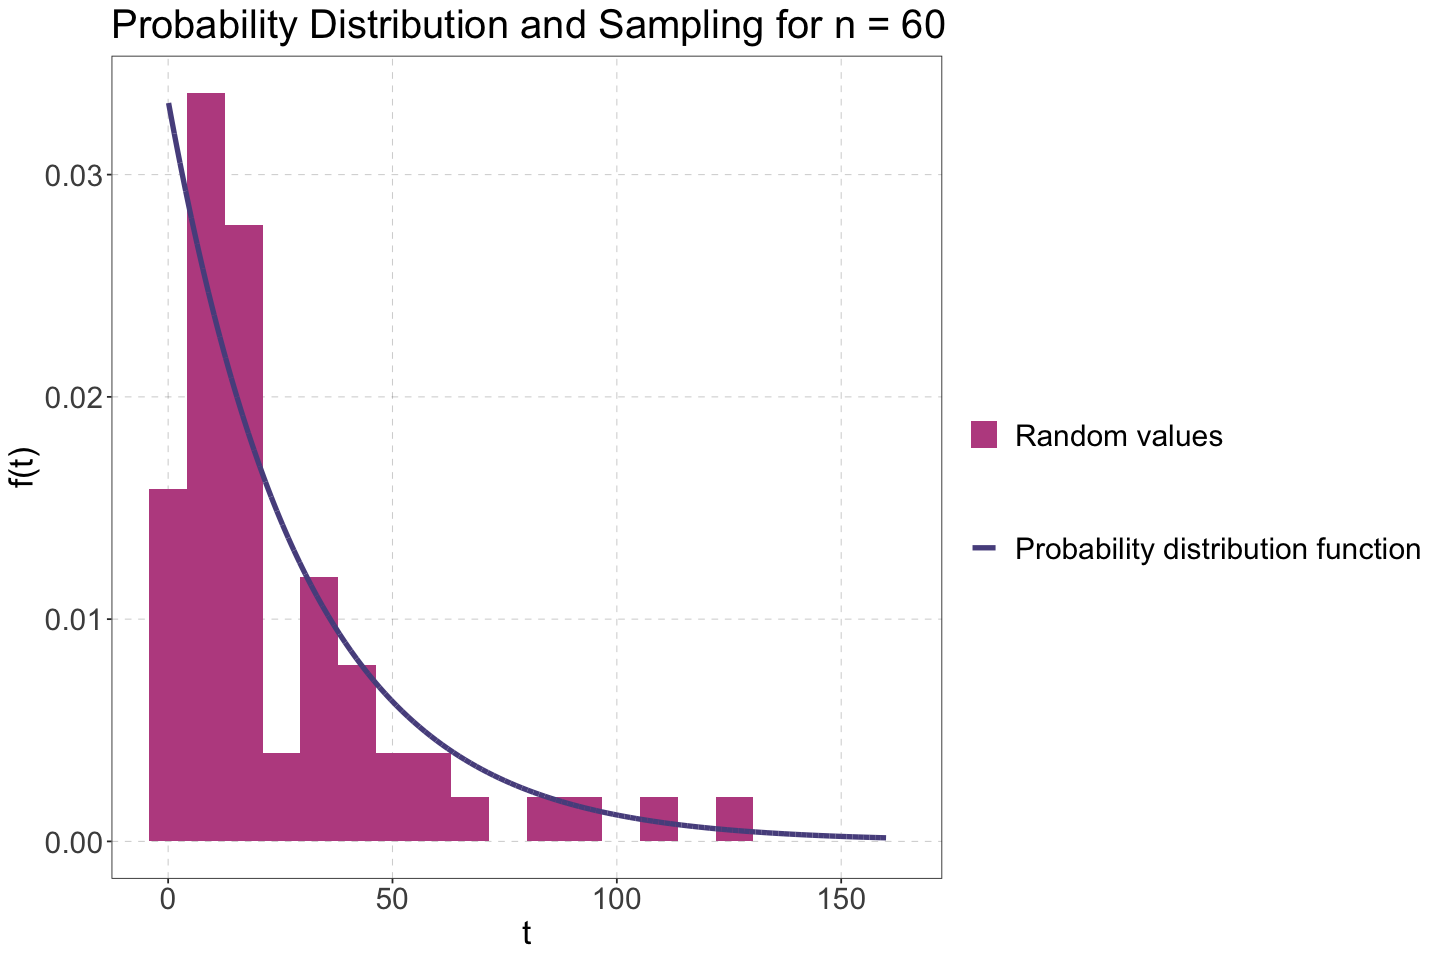

In [17]:
# histogram with distribution

hexp <- ggplot() + 
        geom_histogram(aes( x = t , y = after_stat(density), fill = "Random values") , bins = 20) + 
        geom_line( aes(x = seq(0.1, 160, 0.01), y = dexp(seq(0.1, 160, 0.01), 1/30), color = "Probability distribution function"), linewidth = 1.5)

hexp <- hexp +
        theme_bw() +
        theme( legend.position = "right",
        plot.title = element_text(size = 24),
        axis.title = element_text(size = 20),
        axis.text  = element_text(size = 18),
        legend.title = element_text(size = 20, hjust = 0.5),
        legend.text  = element_text(size = 18),
        panel.grid.major.y = element_line( color = alpha("black",0.2),
                                           linewidth = 0.3,
                                           linetype = 2 ),
        panel.grid.major.x = element_line( color = alpha("black",0.2),
                                          linewidth = 0.3,
                                          linetype = 2 ),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        legend.background = element_rect( fill = "white",
                                          linewidth = 0.5, 
                                          linetype = "solid", 
                                          colour = "white" ) ) +
        labs( x = "t", 
              y = "f(t)", 
              title = "Probability Distribution and Sampling for n = 60" ) +
        scale_x_continuous(n.breaks = 5) +
        scale_color_manual(name = "", 
                        values = c("Probability distribution function" = color_palette[1])) +
        scale_fill_manual(name = "", values = c("Random values" = color_palette[2]))

hexp

Since 60 observations are few to clearly see that the simulation follows the exponential distribution, we perform another simulation with 1000 observations to better visualize the trend of the simulation with respect to the theoretical probability distribution.

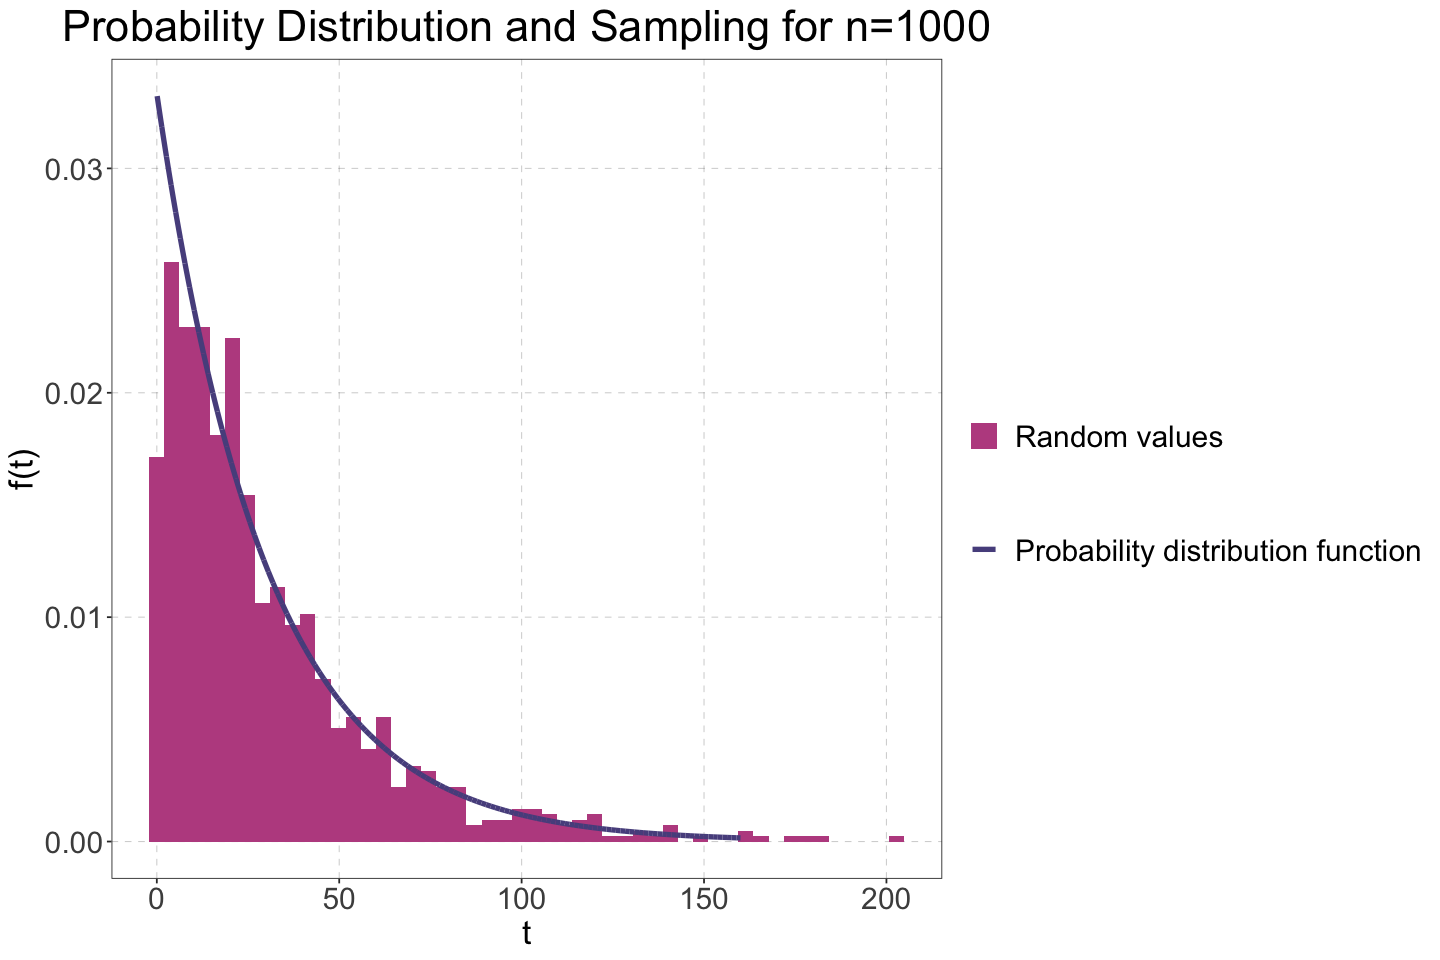

In [18]:
# plot with bigger n to visualize better

t0 <- rexp(n = 1000, rate = 1/30)

hexp0 <- ggplot() + 
        geom_histogram(aes( x = t0 , y = after_stat(density), fill = "Random values") , bins = 50) + 
        geom_line( aes(x = seq(0.1, 160, 0.01), y = dexp(seq(0.1, 160, 0.01), 1/30), color = "Probability distribution function"), linewidth = 1.5)

hexp0 <- hexp0 +
        theme_bw() +
        theme( legend.position = "right",
        plot.title = element_text(size = 26, hjust = 0.5),
        axis.title = element_text(size = 20),
        axis.text  = element_text(size = 18),
        legend.title = element_text(size = 20, hjust = 0.5),
        legend.text  = element_text(size = 18),
        panel.grid.major.y = element_line( color = alpha("black",0.2),
                                           linewidth = 0.3,
                                           linetype = 2 ),
        panel.grid.major.x = element_line( color = alpha("black",0.2),
                                          linewidth = 0.3,
                                          linetype = 2 ),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        legend.background = element_rect( fill = "white",
                                          linewidth = 0.5, 
                                          linetype = "solid", 
                                          colour = "white" ) ) +
        labs( x = "t", 
              y = "f(t)", 
              title = "Probability Distribution and Sampling for n=1000" ) +
        scale_x_continuous(n.breaks = 7) +
        scale_color_manual(name = "", 
                        values = c("Probability distribution function" = color_palette[1])) +
        scale_fill_manual(name = "", values = c("Random values" = color_palette[2]))

hexp0

#### 2) What is the probability that a person will wait for less than 12 minutes?

Firstly, we recall the probability distribution function for the random variables $t_i$ with rate $\lambda$, i.e., the waiting time:

* the probability that the waiting time is at least t is

$$ P(T>t) = e^{- \lambda t} $$

* the probability that the waiting time is less then t is

$$ P(T \le t) = 1- e^{-\lambda t} $$

To compute this probability, we calculate it from the theoretical distribution with $t=12\,\text{min}$ and $\lambda = 1/30$: 

$$ P(t \le 12 \,\text{min}) = 1- e^{-12/30} $$

Then we also estimate this probability from the two different simulations we have done; we expect the probability calculated from the second simulation to be closer to the one from theory.

In [6]:
# from theory

w <- pexp(12, 1/30)

cat(glue("The probability that the waiting time is less than 12 min is {round(w,2)}."))

The probability that the waiting time is less than 12 min is 0.33.

To compute the probability from simulations, we sum all the counts corresponding to our request, then we properly normalize the probability to the total number of counts.

In [11]:
# from first simulation (n = 60)

# to compute the area of the histogram up to t=12 we count all entries that have t<=12
# then we normalize to the total area of the histogram 
s <- length(t[t<=12])/length(t) 

cat(glue("The probability that the waiting time is less than 12 min from the sumulation with n = 60 is {round(s,2)}."))

The probability that the waiting time is less than 12 min from the sumulation with n = 60 is 0.4.

In [19]:
# from second simulation (n = 1000)

s0 <- length(t0[t0<=12])/length(t0)

cat(glue("The probability that the waiting time is less than 12 min from the sumulation with n = 1000 is {round(s0,2)}."))

The probability that the waiting time is less than 12 min from the sumulation with n = 1000 is 0.31.

#### 3) Evaluate the average waiting time from the simulated data and compare it with the expected value (calculated from theory and by manipulating the probability distributions using R)

The expected value from theory is: 

$$ E[X] = \frac{1}\lambda = 30$$

We could also compute it integrating the exponential PDF, $f(t)$, from the definition:

$$ E[X] =  \int_0^{+\infty} t f(t) dt$$

In [20]:
# expected value from integrating the distribution


# exponential distribution function
f <- function(x) {
    x*dexp(x, 1/30)
}

m1 <- integrate(f, 0, Inf)
cat(glue("The expected value from integrating exponential distribution is:"))
m1

The expected value from integrating exponential distribution is:

30 with absolute error < 2.5e-05

In [21]:
# average waiting time from simulation with n = 60

m <- mean(t)

cat(glue("The average waiting time from the simulation with n = 60 is {round(m,2)}"))

The average waiting time from the simulation with n = 60 is 25.42

In [22]:
# average waiting time from simulation n = 1000

m0 <- mean(t0)

cat(glue("The average waiting time from the simulation with n = 1000 is {round(m0,2)}"))

The average waiting time from the simulation with n = 1000 is 30.16

#### 4) What is the probability for waiting more than one hour before being received?

Referring to point 2), the probability that the waiting time is bigger than 1 hour is

$$ P(T>60\,\text{min}) = e^{-60/30} = e^{-2} $$

We could also compute it using the CDF, $F(t) = 1-e^{-\lambda t}$, evaluating the survival probability:

$$ P(T>60\,\text{min}) = 1- F(60) = 1-e^{-2} $$

Then we also estimate this probability from the two different simulations we have done; we expect the probability calculated from the second simulation to be closer to the one from theory.

In [23]:
# from theory

w2 <- exp(-2)

cat(glue("The probability that the waiting time is more than 60 min is {round(w2,2)}."))

The probability that the waiting time is more than 60 min is 0.14.

In [24]:
# from theory with CDF

w1 <- 1 - pexp(60, 1/30)

cat(glue("The probability that the waiting time is more than 60 min (calculated through CDF) is {round(w1,2)}."))

The probability that the waiting time is more than 60 min (calculated through CDF) is 0.14.

In [25]:
# from simulation with n = 60

w11 <- length(t[t >= 60])/length(t)

cat(glue("The probability that the waiting time is more than 60 min (calculated from the simulation with n = 60) is {round(w11,2)}."))

The probability that the waiting time is more than 60 min (calculated from the simulation with n = 60) is 0.08.

In [26]:
# from simulation with n = 1000

w10 <- length(t0[t0 >= 60])/length(t0)

cat(glue("The probability that the waiting time is more than 60 min (calculated from the simulation with n = 1000) is {round(w10,2)}."))

The probability that the waiting time is more than 60 min (calculated from the simulation with n = 1000) is 0.14.

----------------------------------------------------------------------------------------

# Exercise 4: Multiple choices exams

The final exam of a course is given to the students in the format of a multiple choice written test: for each questions there are five possible alternatives. A student either knows the answer, or selects randomly the answer among the five possible choices. We assume that the probability that a student knows the answer is $p=0.7$.

#### 1) Once a correct answer is given, what it the probability that the student really knew the correct answer?

Following Bayes' theorem, we have

$$ P(N|C) = \frac{P(C|N)\,P(N)}{P(C|N)\,P(N) + P(C|\bar{N})P(\bar{N})} $$

where
* $P(N|C)$ is the probability that a student knows the correct answer (N) after giving a correct answer (C)
* $P(C|N)$ is the probability that a student gives a correct answer if the students knows the correct answer, so we have $P(C|N)=1$
* $P(N)$ is the probability that the student knows the correct answer, i.e., $P(N)=0.7$
* $P(C|\bar{N})$ is the probability that a student gives a correct answer but the student does not know the correct answer, and we have $P(C|\bar{N})=\frac{1}{5}$ because every question has 5 possible alternatives and only one of them is correct
* $P(\bar{N})$ is the probability that a student does not know the correct answer, i.e., $P(\bar{N}) = 1 - P(N) = 1- 0.7 = 0.3$

So, in our case, the posterior probability is

$$ P(N|C) = \frac{p}{p+\frac{1}{5}(1-p)} = \frac{0.7}{0.7+\frac{0.3}{5}}$$

In [27]:
post <- 0.7 / (0.7 + 0.3 / 5)

cat(glue("The probability that a student really knew the answer, once a correct answer is given, is {round(post,3)} --> {round(post*100,1)}% ."))

The probability that a student really knew the answer, once a correct answer is given, is 0.921 --> 92.1% .

--------------------------------------------------------------------------------------------

# Exercise 5: Waiting time at the station

Every 30 min there is a train.

If a person arrives at a random time between 10:45 and 11:45, we can assume a uniform distribution of probability that the person arrive at the station, i.e., every minute between 10:45 and 11:45 a person has $\frac{1}{60}$ of probability to arrive at the station. 

Moreover, we can assume a uniform distribution for the waiting time between 0 and 30 min, because every 30 min there is a train leaving the station.

In [28]:
# simulation for the waiting time

nw <- 10^5
wTime <- runif(nw, 0, 30)

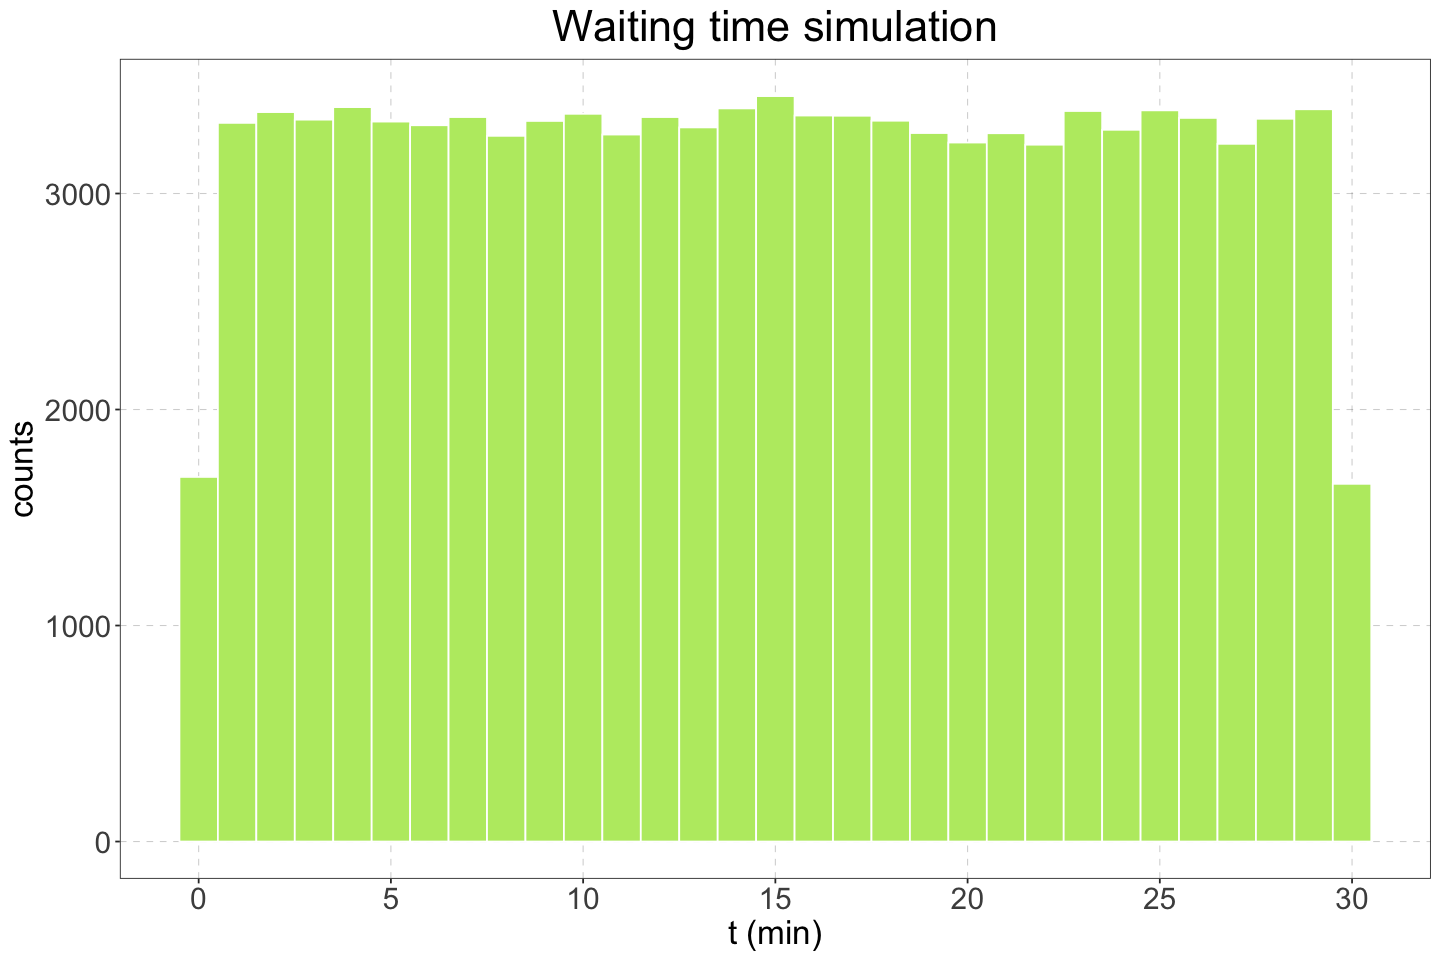

In [29]:
# plot

hw <- ggplot() + geom_histogram( aes(x = wTime), binwidth = 1, colour = "white", fill = "#b9ea70")

hw <- hw +
        theme_bw() +
        theme( legend.position = "right",
        plot.title = element_text(size = 26, hjust = 0.5),
        axis.title = element_text(size = 20),
        axis.text  = element_text(size = 18),
        legend.title = element_text(size = 20, hjust = 0.5),
        legend.text  = element_text(size = 18),
        panel.grid.major.y = element_line( color = alpha("black",0.2),
                                           linewidth = 0.3,
                                           linetype = 2 ),
        panel.grid.major.x = element_line( color = alpha("black",0.2),
                                          linewidth = 0.3,
                                          linetype = 2 ),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        legend.background = element_rect( fill = "white",
                                          linewidth = 0.5, 
                                          linetype = "solid", 
                                          colour = "white" ) ) +
        labs( x = "t (min)", 
              y = "counts", 
              title = "Waiting time simulation" ) +
        scale_x_continuous(n.breaks = 6)

hw

### 1) Probability of waiting at most 10 min

To wait at most 10 min, a person has to arrive between 10:50 and 11:00 or between 11:20 and 11:30, so the probability we search for is

$$ P(t \le 10 \,\text{min}) = \frac{10}{60} + \frac{10}{60} = \frac{1}{3}

In [30]:
# from theory

p1 <- 1/3

cat(glue("The probability that the waiting time is at most 10 min is {round(p1*100,2)}%."))

The probability that the waiting time is at most 10 min is 33.33%.

In [31]:
# from simulation

p11 <- length(wTime[wTime <= 10]) / length(wTime)

cat(glue("The probability that the waiting time is at most 10 min, calculated from the sumulation, is {round(p11*100,2)}%."))

The probability that the waiting time is at most 10 min, calculated from the sumulation, is 33.49%.

### 2) Probability of waiting at least 15 min

To wait at least 15 min, a person has to arrive between 11:00 and 11:15 and between 11:30 and 11:45, so the probability we search for is

$$ P(t \ge 15 \, \text{min}) = \frac{15}{60} + \frac{15}{60} = \frac{1}{2}

In [32]:
# from theory 

p2 <- 1/2

cat(glue("The probability that the waiting time is at least 15 min is {round(p2*100,2)}%."))

The probability that the waiting time is at least 15 min is 50%.

In [33]:
# from simulation

p22 <- length(wTime[wTime >= 15]) / length(wTime)

cat(glue("The probability that the waiting time is at least 15 min, calculated from the sumulation, is {round(p22*100,2)}%."))

The probability that the waiting time is at least 15 min, calculated from the sumulation, is 49.85%.

### 3) Average of time spent waiting

Assuming a uniform distribution between 0 and 30, we expect that the average of time spent waiting coincides with the expectation value of the uniform distribution, i.e., 15 min.

In [34]:
# expectation value of the uniform distribution

m <- 30/2

cat(glue("The expectation value is {round(m,2)}."))

The expectation value is 15.

In [35]:
# average waiting time from simulation

m1 <- mean(wTime)

cat(glue("The average waiting time from the sumulation is {round(m1,2)}."))

The average waiting time from the sumulation is 14.97.

---------------------------------------------------------------------------------------

# Exercise 6: Stock investment

The annual return rate for a specific stock on the market is a normal variable with a $10%$ mean and a $12%$ standard deviation. Mr X decides to buy 200 shares of that specific stock at a price of 85€ per share.  

#### 1) What is the probability that after a year his net profit from the investment is at least 800€? Suppose there are no transaction costs and that there are no annual dividend for the stock.

Firstly, we plot the distribution of the annual return rate for all the shares. We multiply the mean and the variance of the probability distribution of the annual return rate for a share by the total number of shares and by the price per share. Then, we obtain the probability distribution for the net profit from the investment, that is a normal distribution. To find the probability that the net profit is at least 800€, we compute the survival probability from the distribution:

$$ P(\text{profit} \ge 800 €) = 1 - F(\text{profit} = 800€) $$

where $ F(\text{profit}) $ is the CDF.

In [872]:
mean <- 200 * 85 * 0.1
variance <- 200 * 85 * 0.12

cat(glue("The mean of the net profit probability distribution is {mean}."))
cat("\n")
cat(glue("The variance of the net profit probability distribution is {variance}."))

The mean of the net profit probability distribution is 1700.
The variance of the net profit probability distribution is 2040.

In [873]:
# generating net profit probability distribution

# values for net profit
xmin <- mean-5*variance
xmax <- mean+5*variance
x <- seq(xmin, xmax, 1)

# probability values
n <- dnorm(x, mean, variance)

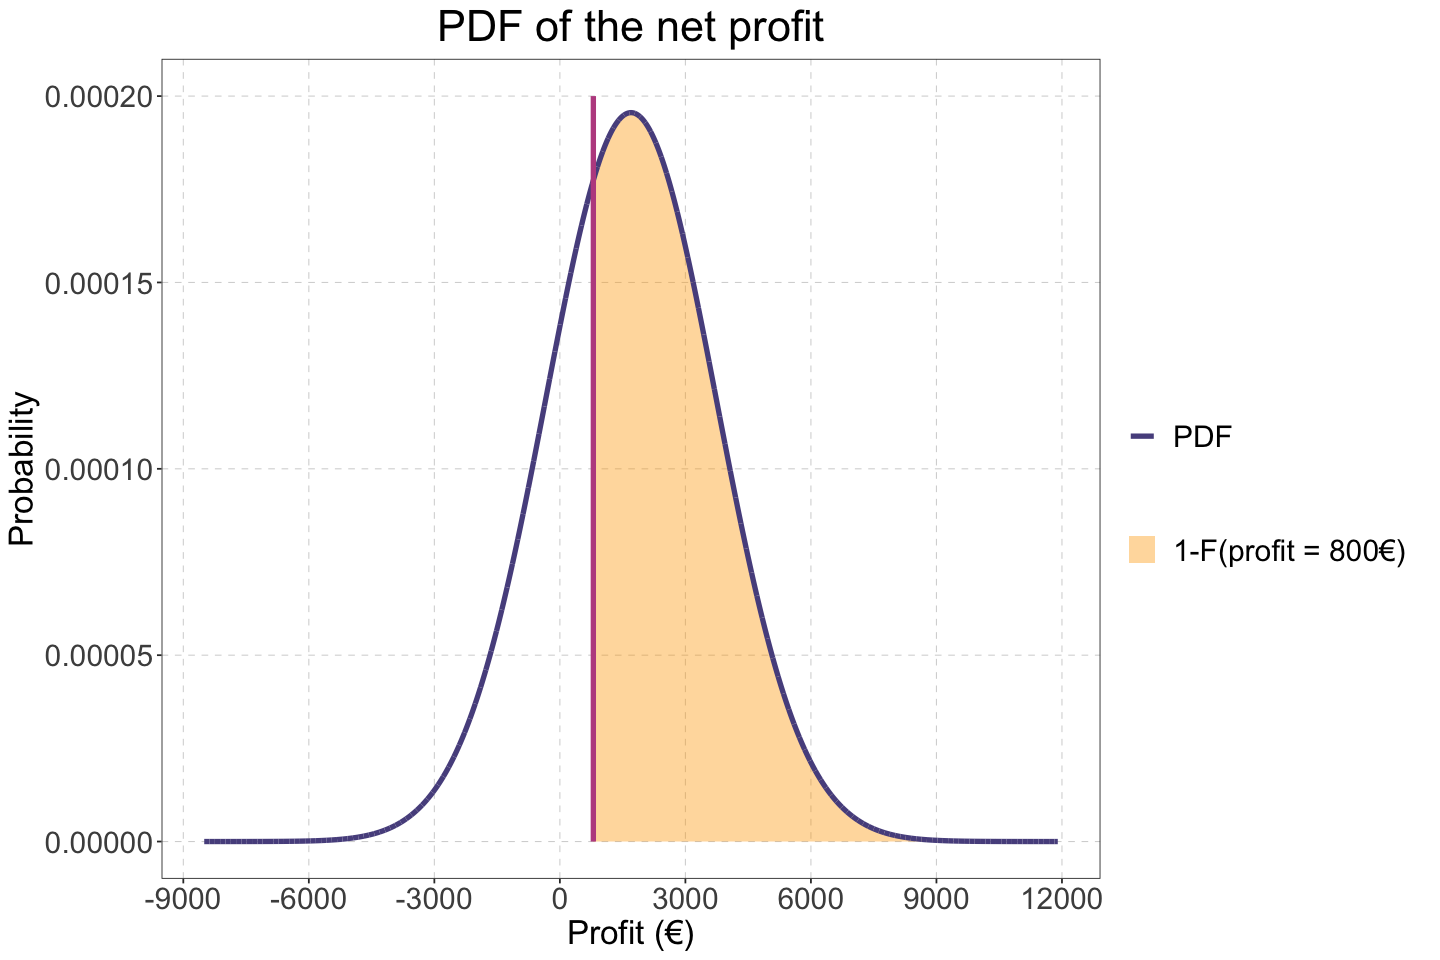

In [874]:
# silence unnecessary warnings
defaultW <- getOption("warn") 
options(warn = -1) 


# plot

plot <- ggplot() + 
        geom_area( aes( 
                    x = x[x>800], 
                    y = n[x>800], 
                    fill = "1-F(profit = 800€)" ),
                   alpha = 0.4) +
        geom_line( aes(x=x, y=n, color = "PDF"),
                linewidth = 1.5 ) +
        geom_segment(aes(x = 800, y = 0, xend = 800, yend = 0.00020), 
                        color = color_palette[2],
                        linewidth = 1.5) 
        

plot <- plot +
        theme_bw() +
        theme( legend.position = "right",
        plot.title = element_text(size = 26, hjust = 0.5),
        axis.title = element_text(size = 20),
        axis.text  = element_text(size = 18),
        legend.title = element_text(size = 20, hjust = 0.5),
        legend.text  = element_text(size = 18),
        panel.grid.major.y = element_line( color = alpha("black",0.2),
                                           linewidth = 0.3,
                                           linetype = 2 ),
        panel.grid.major.x = element_line( color = alpha("black",0.2),
                                          linewidth = 0.3,
                                          linetype = 2 ),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        legend.background = element_rect( fill = "white",
                                          linewidth = 0.5, 
                                          linetype = "solid", 
                                          colour = "white" ) ) +
        labs( x = "Profit (€)", 
              y = "Probability", 
              title = "PDF of the net profit" ) +
        scale_color_manual(name = "", 
                        values = c("PDF" = color_palette[1])) + 
        scale_fill_manual( name = "",
                           values = c("1-F(profit = 800€)" = color_palette[4])) +
        scale_x_continuous(n.breaks = 8)

plot


# setting default warning again
options(warn = defaultW)

In [875]:
# probability that after a year his net profit is at least 800€

sp <- 1 - pnorm(800, mean, variance)

cat(glue("The probability that after a year the net profit is at least 800€ is {round(sp*100,2)}%."))

The probability that after a year the net profit is at least 800€ is 67.05%.